In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as op
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sklearn

In [49]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

In [50]:
tr = pd.read_csv("train.csv")
te = pd.read_csv("test.csv")
tr_te = pd.concat([tr,te],axis=0,ignore_index=True)
tr_te.head()

,Campaign_id,platform,media_name,media type,grp,reach
0,C000000001,mobile,media c,social media,310.0,0.20%
1,C000000002,mobile,media a,others,301.0,0.70%
2,C000000004,mobile,media c,social media,1497.0,2.10%
3,C000000007,mobile,media g,long video,1281.0,2.40%
4,C000000010,mobile,media h,long video,1627.0,2.40%


In [51]:
tr.info()  #查看列名、缺失情况、数据类型
tr.describe() #数值型特征描述统计

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Campaign_id  3501 non-null   object 
 1   platform     3501 non-null   object 
 2   media_name   3501 non-null   object 
 3   media type   3501 non-null   object 
 4   grp          3501 non-null   float64
 5   reach        3501 non-null   object 
dtypes: float64(1), object(5)
memory usage: 164.2+ KB


,grp
count,3501.000000
mean,1402.052922
std,3651.089787
min,0.000000
25%,97.000000
50%,390.000000
75%,1469.000000
max,109215.000000


In [52]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label = LabelEncoder()

# 法一：
tr['platform'] = label.fit_transform(tr['platform'])  
tr['media_name'] = label.fit_transform(tr['media_name']) 
tr

,Campaign_id,platform,media_name,media type,grp,reach
0,C000000001,0,2,social media,310.0,0.20%
1,C000000002,0,0,others,301.0,0.70%
2,C000000004,0,2,social media,1497.0,2.10%
3,C000000007,0,6,long video,1281.0,2.40%
4,C000000010,0,7,long video,1627.0,2.40%
...,...,...,...,...,...,...
3496,C000006484,1,3,others,170.0,0.30%
3497,C000006485,1,4,others,674.0,0.60%
3498,C000006486,1,5,others,3299.0,2.00%
3499,C000006491,1,8,others,524.0,0.60%


In [53]:
tr['reach'] = tr['reach'].str.strip('%').astype(float)/100  

In [56]:
tr.describe() #数值型特征描述统计

,platform,media_name,grp,reach
count,3501.000000,3501.000000,3501.000000,3501.000000
mean,0.381034,8.467009,1402.052922,142.131054
std,0.485710,4.818045,3651.089787,198.001412
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,97.000000,10.000000
50%,0.000000,8.000000,390.000000,60.000000
75%,1.000000,12.000000,1469.000000,200.000000
max,1.000000,16.000000,109215.000000,1790.000000


In [57]:
equation = []

In [58]:
def index(pn):
    global y_group
    global x_group
    # 需要拟合的数据组
    pn_round = pn.round({'grp': 4, 'reach': 4})
    x_group = np.array(pn_round['grp'])
    y_group = np.array(pn_round['reach'])
    
    # 需要拟合的函数
    def f_1(x, A, B, C, D ,E):
        return A * x**4 + B * x**3 + C * x**2 + D * x**1 + E
    #得到返回的A，B值
    A, B, C, D, E = op.curve_fit(f_1, x_group, y_group)[0]

    # 数据点与原先的进行画图比较
    plt.scatter(x_group, y_group, marker='o',label='真实值')
    x = np.arange(0, 30, 0.001)
    y = A * x**4 + B * x**3 + C * x**2 + D * x**1 +E
    plt.plot(x, y,color='red',label='拟合曲线')
    plt.legend() # 显示label
    plt.xlabel("grp")
    plt.ylabel("reach")
    plt.show()
    equation.append([p,n,f'{A} * x**4 + {B} * x**3 + {C} * x**2 + {D} * x**1 +{E} ',x_group,y_group])


In [59]:
n0 = [0,1,2,9,10,12,16]
n1 = [3,4,5,8,13,14]
n01 = [6,7,11,15]

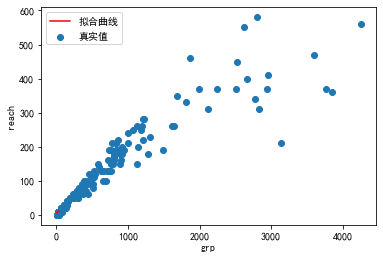

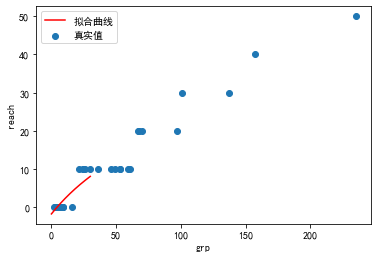

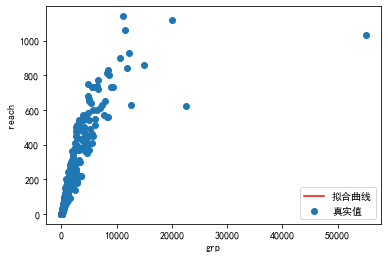

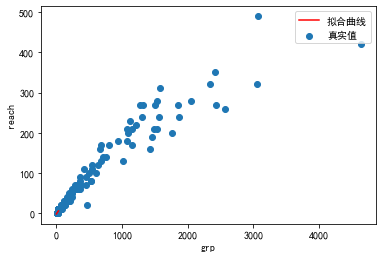

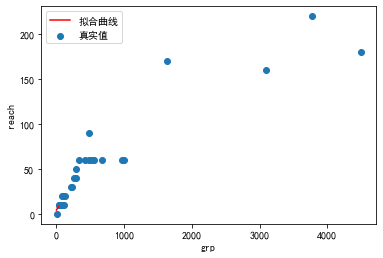

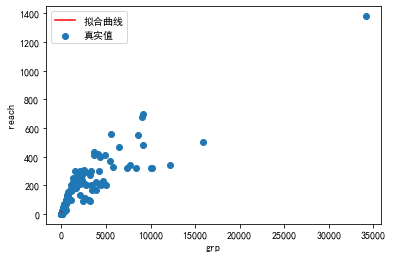

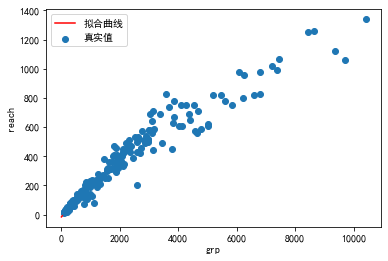

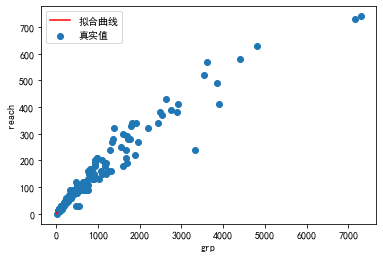

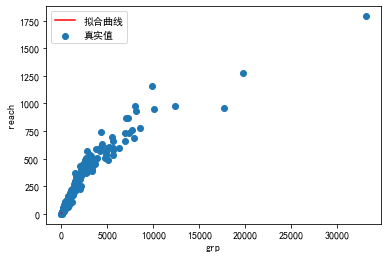

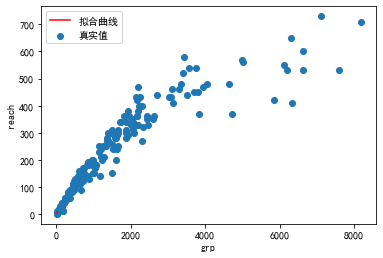

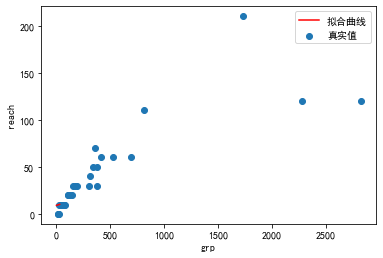

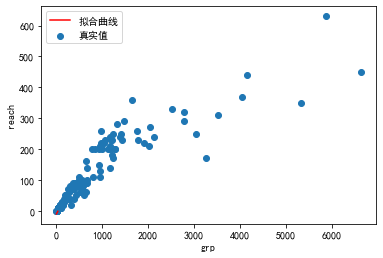

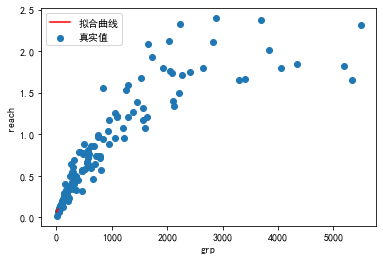

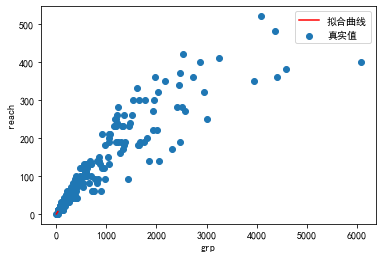

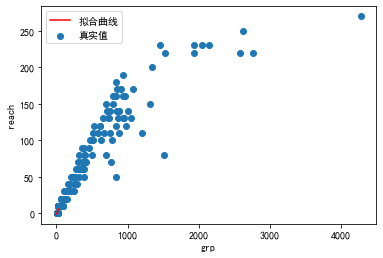

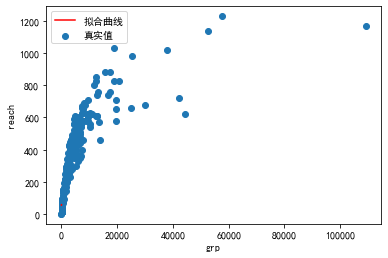

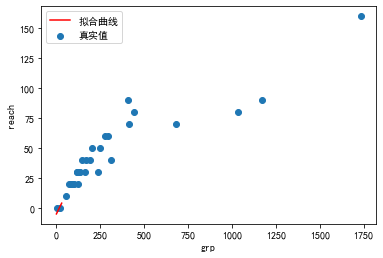

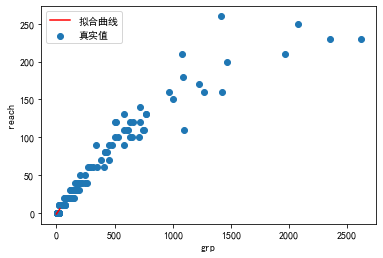

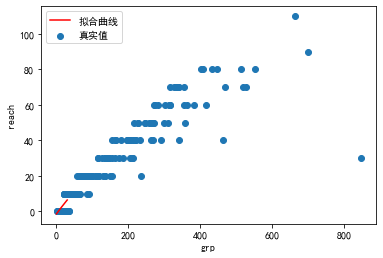

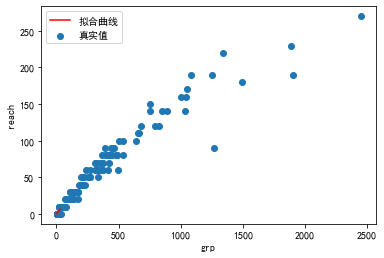

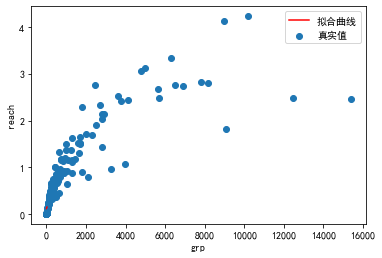

In [60]:
for n in range(17):     
    if n in n0:
        p = 0
        classify(p,n)
    elif n in n1:
        p = 1
        classify(p,n)
    else:
        plist = [0,1]
        for p in plist:
            classify(p,n)

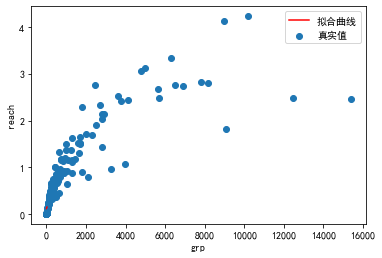

In [61]:
def classify(p,n):
    pn = tr[ (tr['platform'] == p)  &  (tr['media_name'] == n) ]
    index(pn)
classify(p,n)

In [62]:
equation = pd.DataFrame(equation)

In [63]:
equation.columns = ['platform','media_name','equation','x_group','y_group']
equation

,platform,media_name,equation,x_group,y_group
0,0,0,8.358288657229402e-12 * x**4 + -5.978937801336...,"[301.0, 38.0, 325.0, 23.0, 105.0, 299.0, 139.0...","[70.0, 10.0, 70.0, 10.0, 20.0, 70.0, 20.0, 20...."
1,0,1,-7.081279128057208e-08 * x**4 + 2.999371277303...,"[24.0, 4.0, 68.0, 8.0, 7.0, 157.0, 101.0, 61.0...","[10.0, 0.0, 20.0, 0.0, 0.0, 40.0, 30.0, 10.0, ..."
2,0,2,-1.607787499288402e-16 * x**4 + 8.488173947730...,"[310.0, 1497.0, 1061.0, 11567.0, 1010.0, 189.0...","[20.0, 210.0, 120.0, 1060.0, 80.0, 20.0, 40.0,..."
3,1,3,-2.349420587876182e-12 * x**4 + 2.279231275680...,"[175.0, 39.0, 377.0, 39.0, 443.0, 141.0, 130.0...","[40.0, 10.0, 70.0, 10.0, 70.0, 30.0, 30.0, 60...."
4,1,4,-2.512460283338274e-12 * x**4 + 2.199925466906...,"[480.0, 122.0, 211.0, 78.0, 55.0, 78.0, 90.0, ...","[60.0, 20.0, 30.0, 10.0, 10.0, 10.0, 20.0, 10...."
5,1,5,-8.87827458793087e-15 * x**4 + 6.2392043322982...,"[8585.0, 4224.0, 5416.0, 6.0, 2.0, 22.0, 6.0, ...","[550.0, 300.0, 370.0, 0.0, 0.0, 10.0, 0.0, 70...."
6,0,6,-1.171223040699868e-13 * x**4 + 3.311486587829...,"[1281.0, 103.0, 1932.0, 82.0, 2572.0, 1019.0, ...","[240.0, 20.0, 400.0, 20.0, 430.0, 210.0, 130.0..."
7,1,6,-4.686834720843802e-13 * x**4 + 6.579524062664...,"[655.0, 130.0, 1019.0, 78.0, 1600.0, 450.0, 47...","[90.0, 20.0, 130.0, 10.0, 180.0, 80.0, 80.0, 1..."
8,0,7,-7.305976405625515e-15 * x**4 + 5.637863468985...,"[1627.0, 256.0, 2323.0, 388.0, 3256.0, 158.0, ...","[240.0, 40.0, 440.0, 60.0, 440.0, 30.0, 110.0,..."
9,1,7,3.2961576906801373e-13 * x**4 + -2.26348975835...,"[1913.0, 462.0, 3031.0, 174.0, 5010.0, 1292.0,...","[290.0, 90.0, 430.0, 40.0, 560.0, 210.0, 60.0,..."


In [64]:
# #################################拟合优度R^2的计算######################################
def __sst(y_no_fitting):
    """
    计算SST(total sum of squares) 总平方和
    :param y_no_predicted: List[int] or array[int] 待拟合的y
    :return: 总平方和SST
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_no_fitting]
    sst = sum(s_list)
    return sst


def __ssr(y_fitting, y_no_fitting):
    """
    计算SSR(regression sum of squares) 回归平方和
    :param y_fitting: List[int] or array[int]  拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 回归平方和SSR
    """
    y_mean = sum(y_no_fitting) / len(y_no_fitting)
    s_list =[(y - y_mean)**2 for y in y_fitting]
    ssr = sum(s_list)
    return ssr


def __sse(y_fitting, y_no_fitting):
    """
    计算SSE(error sum of squares) 残差平方和
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 残差平方和SSE
    """
    s_list = [(y_fitting[i] - y_no_fitting[i])**2 for i in range(len(y_fitting))]
    sse = sum(s_list)
    return sse


def goodness_of_fit(y_fitting, y_no_fitting):
    """
    计算拟合优度R^2
    :param y_fitting: List[int] or array[int] 拟合好的y值
    :param y_no_fitting: List[int] or array[int] 待拟合y值
    :return: 拟合优度R^2
    """
    SSR = __ssr(y_fitting, y_no_fitting)
    SST = __sst(y_no_fitting)
    rr = SSR /SST
    return rr

In [65]:
rate = []

for row in equation.index:
    equation0 = equation.loc[row]['equation']
    X0 = equation.loc[row]['x_group']
    Y0 = equation.loc[row]['y_group']
    Y_predict = list(map(lambda x:eval(equation0), X0))
    rr1 = goodness_of_fit(Y_predict, Y0)
    rate.append(rr1)
    
rate = pd.DataFrame(rate)


In [66]:
result = pd.concat([equation,rate],axis=1,ignore_index=False)
result = result.drop(['x_group','y_group'],axis = 1)
result.columns = ['platform','media_name','equation','fitness']
result

,platform,media_name,equation,fitness
0,0,0,8.358288657229402e-12 * x**4 + -5.978937801336...,0.929553
1,0,1,-7.081279128057208e-08 * x**4 + 2.999371277303...,0.942529
2,0,2,-1.607787499288402e-16 * x**4 + 8.488173947730...,0.921959
3,1,3,-2.349420587876182e-12 * x**4 + 2.279231275680...,0.954361
4,1,4,-2.512460283338274e-12 * x**4 + 2.199925466906...,0.926692
5,1,5,-8.87827458793087e-15 * x**4 + 6.2392043322982...,0.870235
6,0,6,-1.171223040699868e-13 * x**4 + 3.311486587829...,0.952121
7,1,6,-4.686834720843802e-13 * x**4 + 6.579524062664...,0.952933
8,0,7,-7.305976405625515e-15 * x**4 + 5.637863468985...,0.964186
9,1,7,3.2961576906801373e-13 * x**4 + -2.26348975835...,0.947447


In [68]:
result.to_csv('模型拟合优度.csv',index = None)